https://github.com/NajibHaidar

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.decomposition import PCA
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.nn import functional as F
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

In [ ]:
class ThreeLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ThreeLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
X_np = np.arange(0, 31)
Y_np = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

X = torch.tensor(X_np, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(Y_np, dtype=torch.float32).view(-1, 1)

In [ ]:
# Split the data into training and test sets
X_train_tensorA = X[:20]
Y_train_tensorA = Y[:20]
X_test_tensorA = X[20:]
Y_test_tensorA = Y[20:]

In [ ]:
print(Y_test_tensorA.shape)

torch.Size([11, 1])


In [ ]:
input_size = 1
hidden_size = 32
output_size = 1
learning_rate = 0.01
epochs = 1000

model = ThreeLayerNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensorA)
    loss = criterion(outputs, Y_train_tensorA)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 100.6723
Epoch [200/1000], Loss: 5.9533
Epoch [300/1000], Loss: 5.0120
Epoch [400/1000], Loss: 5.0100
Epoch [500/1000], Loss: 5.0075
Epoch [600/1000], Loss: 5.0043
Epoch [700/1000], Loss: 4.9997
Epoch [800/1000], Loss: 4.9917
Epoch [900/1000], Loss: 4.9825
Epoch [1000/1000], Loss: 4.9753


In [ ]:
with torch.no_grad():
    train_outputsA = model(X_train_tensorA)
    train_lossA = criterion(train_outputsA, Y_train_tensorA)
    print(f'Least-square error on training data: {train_lossA.item():.4f}')

    test_outputsA = model(X_test_tensorA)
    test_lossA = criterion(test_outputsA, Y_test_tensorA)
    print(f'Least-square error on test data: {test_lossA.item():.4f}')

Least-square error on training data: 4.9752
Least-square error on test data: 52.4718


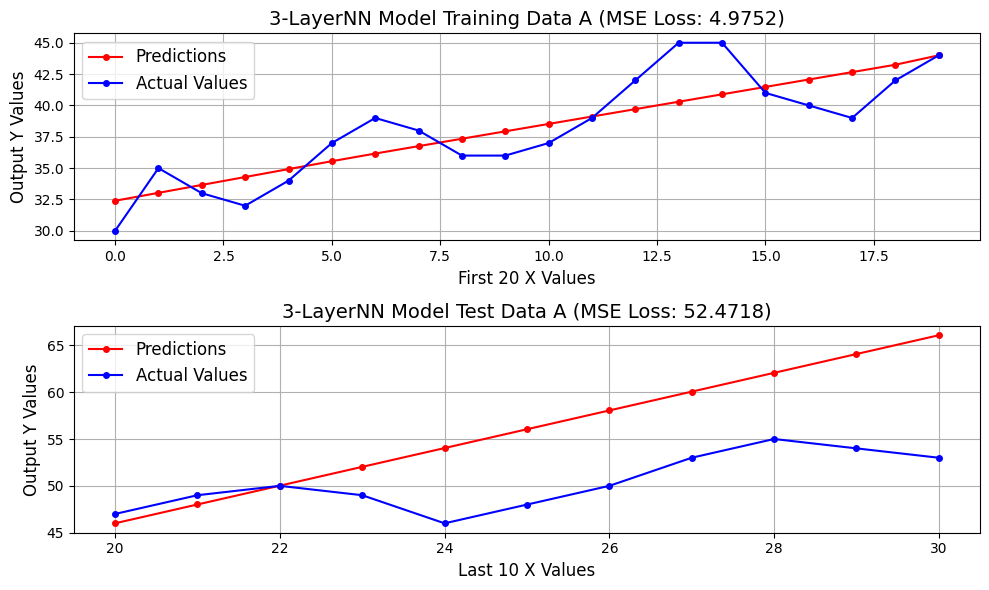

In [ ]:
# Convert the tensors to numpy arrays for plotting
train_outputsA_np = train_outputsA.numpy()
Y_train_tensorA_np = Y_train_tensorA.numpy()
test_outputsA_np = test_outputsA.numpy()
Y_test_tensorA_np = Y_test_tensorA.numpy()

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, figsize=(10, 6))

# Plot train_outputsA vs Y_train_tensorA_np
axs[0].plot(X_train_tensorA.numpy(), train_outputsA_np, 'ro-', label='Predictions', markersize=4)
axs[0].plot(X_train_tensorA.numpy(), Y_train_tensorA_np, 'bo-', label='Actual Values', markersize=4)
axs[0].set_title(f'3-LayerNN Model Training Data A (MSE Loss: {train_lossA.item():.4f})', fontsize=14)
axs[0].set_xlabel('First 20 X Values', fontsize=12)
axs[0].set_ylabel('Output Y Values', fontsize=12)
axs[0].grid(True)
axs[0].legend(fontsize=12)

# Plot test_outputsA vs Y_test_tensorA_np
axs[1].plot(X_test_tensorA.numpy(), test_outputsA_np, 'ro-', label='Predictions', markersize=4)
axs[1].plot(X_test_tensorA.numpy(), Y_test_tensorA_np, 'bo-', label='Actual Values', markersize=4)
axs[1].set_title(f'3-LayerNN Model Test Data A (MSE Loss: {test_lossA.item():.4f})', fontsize=14)
axs[1].set_xlabel('Last 10 X Values', fontsize=12)
axs[1].set_ylabel('Output Y Values', fontsize=12)
axs[1].grid(True)
axs[1].legend(fontsize=12)

# Improve the layout
plt.tight_layout()
plt.show()

In [ ]:
# Split the data into training and test sets
X_train_tensorB = torch.cat((X[:10], X[-10:]), dim=0)
Y_train_tensorB = torch.cat((Y[:10], Y[-10:]), dim=0)
X_test_tensorB = X[10:20]
Y_test_tensorB = Y[10:20]

In [ ]:
# Train the neural network
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensorB)
    loss = criterion(outputs, Y_train_tensorB)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 3.6902
Epoch [200/1000], Loss: 3.6604
Epoch [300/1000], Loss: 3.6307
Epoch [400/1000], Loss: 3.6009
Epoch [500/1000], Loss: 3.5718
Epoch [600/1000], Loss: 3.5424
Epoch [700/1000], Loss: 3.5127
Epoch [800/1000], Loss: 3.4824
Epoch [900/1000], Loss: 3.4514
Epoch [1000/1000], Loss: 3.4194


In [ ]:
# Calculate the least-square error on training and test data
with torch.no_grad():
    train_outputsB = model(X_train_tensorB)
    train_lossB = criterion(train_outputsB, Y_train_tensorB)
    print(f'Least-square error on training data: {train_lossB.item():.4f}')

    test_outputsB = model(X_test_tensorB)
    test_lossB = criterion(test_outputsB, Y_test_tensorB)
    print(f'Least-square error on test data: {test_lossB.item():.4f}')

Least-square error on training data: 3.4191
Least-square error on test data: 8.2321


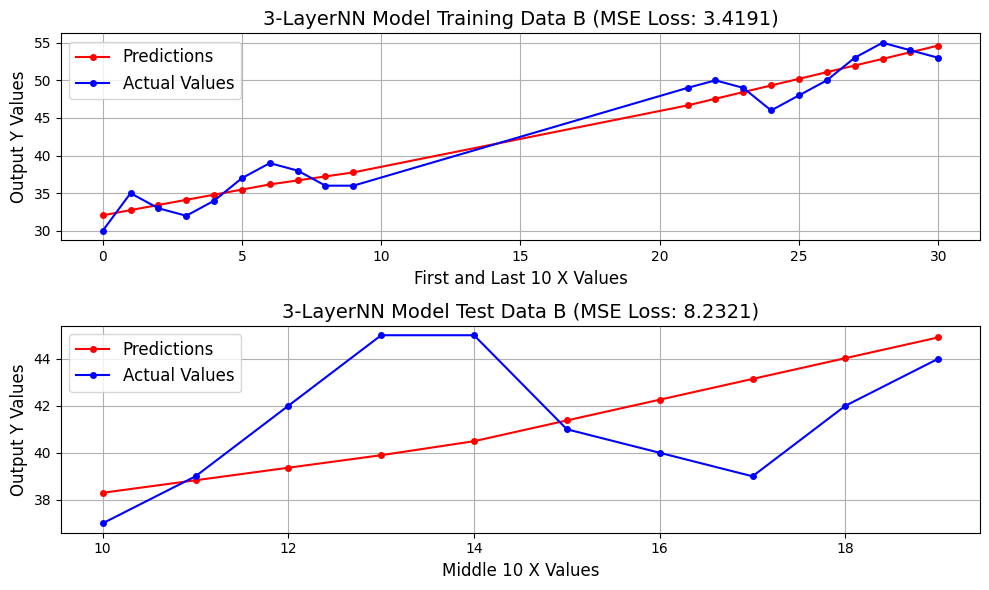

In [ ]:
# Convert the tensors to numpy arrays for plotting
train_outputsB_np = train_outputsB.numpy()
Y_train_tensorB_np = Y_train_tensorB.numpy()
test_outputsB_np = test_outputsB.numpy()
Y_test_tensorB_np = Y_test_tensorB.numpy()

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, figsize=(10, 6))

# Plot train_outputsB vs Y_train_tensorB_np
axs[0].plot(X_train_tensorB.numpy(), train_outputsB_np, 'ro-', label='Predictions', markersize=4)
axs[0].plot(X_train_tensorB.numpy(), Y_train_tensorB_np, 'bo-', label='Actual Values', markersize=4)
axs[0].set_title(f'3-LayerNN Model Training Data B (MSE Loss: {train_lossB.item():.4f})', fontsize=14)
axs[0].set_xlabel('First and Last 10 X Values', fontsize=12)
axs[0].set_ylabel('Output Y Values', fontsize=12)
axs[0].grid(True)
axs[0].legend(fontsize=12)

# Plot test_outputsB vs Y_test_tensorB_np
axs[1].plot(X_test_tensorB.numpy(), test_outputsB_np, 'ro-', label='Predictions', markersize=4)
axs[1].plot(X_test_tensorB.numpy(), Y_test_tensorB_np, 'bo-', label='Actual Values', markersize=4)
axs[1].set_title(f'3-LayerNN Model Test Data B (MSE Loss: {test_lossB.item():.4f})', fontsize=14)
axs[1].set_xlabel('Middle 10 X Values', fontsize=12)
axs[1].set_ylabel('Output Y Values', fontsize=12)
axs[1].grid(True)
axs[1].legend(fontsize=12)

# Improve the layout
plt.tight_layout()
plt.show()

In [ ]:
# We are fitting a 19th-degree polynomial to only 20 data points, which can cause numerical instabilities and overfitting. 
# So will suppress the warning "RankWarning: Polyfit may be poorly conditioned.
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=np.RankWarning)
    
    # Split data into training and test sets
    X_train_npA = X_np[:20]
    Y_train_npA = Y_np[:20]
    X_test_npA = X_np[20:]
    Y_test_npA = Y_np[20:]

    # Fit a line to the training data
    line_coeffs_trainA = np.polyfit(X_train_npA, Y_train_npA, deg=1)
    line_predictions_trainA = np.polyval(line_coeffs_trainA, X_train_npA)
    line_error_trainA = np.sqrt(np.sum((Y_train_npA - line_predictions_trainA) ** 2)/20)

    # Fit a parabola to the training data
    parabola_coeffs_trainA = np.polyfit(X_train_npA, Y_train_npA, deg=2)
    parabola_predictions_trainA = np.polyval(parabola_coeffs_trainA, X_train_npA)
    parabola_error_trainA = np.sqrt(np.sum((Y_train_npA - parabola_predictions_trainA) ** 2)/20)

    # Fit a 19th degree polynomial to the training data
    poly19_coeffs_trainA = np.polyfit(X_train_npA, Y_train_npA, deg=19)
    poly19_predictions_trainA = np.polyval(poly19_coeffs_trainA, X_train_npA)
    poly19_error_trainA = np.sqrt(np.sum((Y_train_npA - poly19_predictions_trainA) ** 2)/20)

    # Compute errors on test data
    line_predictions_testA = np.polyval(line_coeffs_trainA, X_test_npA)
    line_error_testA = np.sqrt(np.sum((Y_test_npA - line_predictions_testA) ** 2)/10)

    parabola_predictions_testA = np.polyval(parabola_coeffs_trainA, X_test_npA)
    parabola_error_testA = np.sqrt(np.sum((Y_test_npA - parabola_predictions_testA) ** 2)/10)

    poly19_predictions_testA = np.polyval(poly19_coeffs_trainA, X_test_npA)
    poly19_error_testA = np.sqrt(np.sum((Y_test_npA - poly19_predictions_testA) ** 2)/10)

# Print errors for each model on training and test data
print("LINE MODEL, -Test End-:")
print("Training Error:", line_error_trainA)
print("Test Error:", line_error_testA)
print()
print("PARABOLA MODEL, -Test End-:")
print("Training Error:", parabola_error_trainA)
print("Test Error:", parabola_error_testA)
print()
print("19th DEGREE POLYNOMIAL MODEL, -Test End-:")
print("Training Error:", poly19_error_trainA)
print("Test Error:", poly19_error_testA)

LINE MODEL, -Test End-:
Training Error: 2.242749386808539
Test Error: 3.5278140684148744

PARABOLA MODEL, -Test End-:
Training Error: 2.125539348277377
Test Error: 9.13895508870405

19th DEGREE POLYNOMIAL MODEL, -Test End-:
Training Error: 0.02835144302630829
Test Error: 30023572038.45924


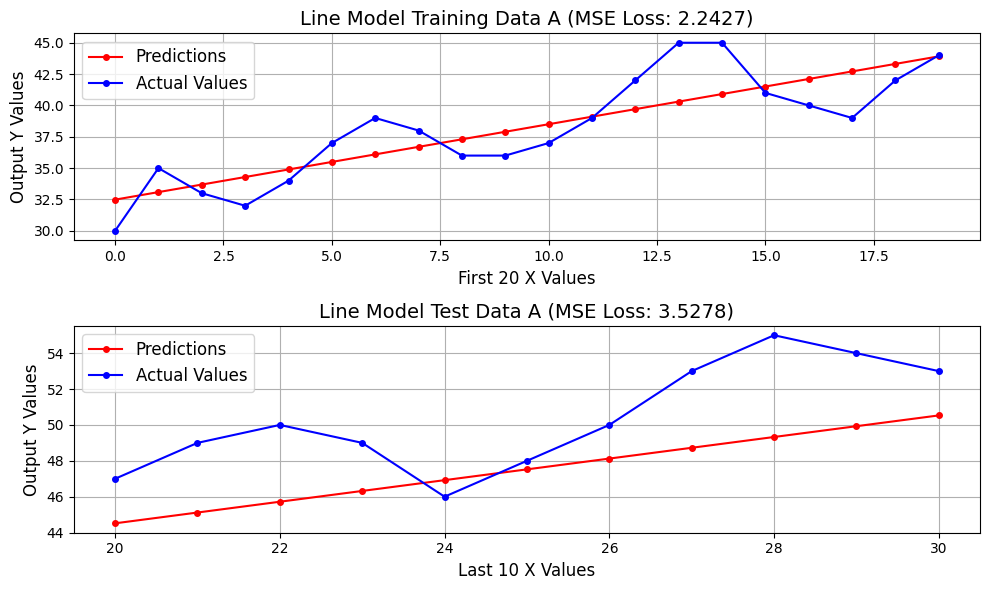

In [ ]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, figsize=(10, 6))

# Plot line_predictions_trainA vs Y_train_npA
axs[0].plot(X_train_npA, line_predictions_trainA, 'ro-', label='Predictions', markersize=4)
axs[0].plot(X_train_npA, Y_train_npA, 'bo-', label='Actual Values', markersize=4)
axs[0].set_title(f'Line Model Training Data A (MSE Loss: {line_error_trainA:.4f})', fontsize=14)
axs[0].set_xlabel('First 20 X Values', fontsize=12)
axs[0].set_ylabel('Output Y Values', fontsize=12)
axs[0].grid(True)
axs[0].legend(fontsize=12)

# Plot line_predictions_testA vs Y_test_npA
axs[1].plot(X_test_npA, line_predictions_testA, 'ro-', label='Predictions', markersize=4)
axs[1].plot(X_test_npA, Y_test_npA, 'bo-', label='Actual Values', markersize=4)
axs[1].set_title(f'Line Model Test Data A (MSE Loss: {line_error_testA:.4f})', fontsize=14)
axs[1].set_xlabel('Last 10 X Values', fontsize=12)
axs[1].set_ylabel('Output Y Values', fontsize=12)
axs[1].grid(True)
axs[1].legend(fontsize=12)

# Improve the layout
plt.tight_layout()
plt.show()

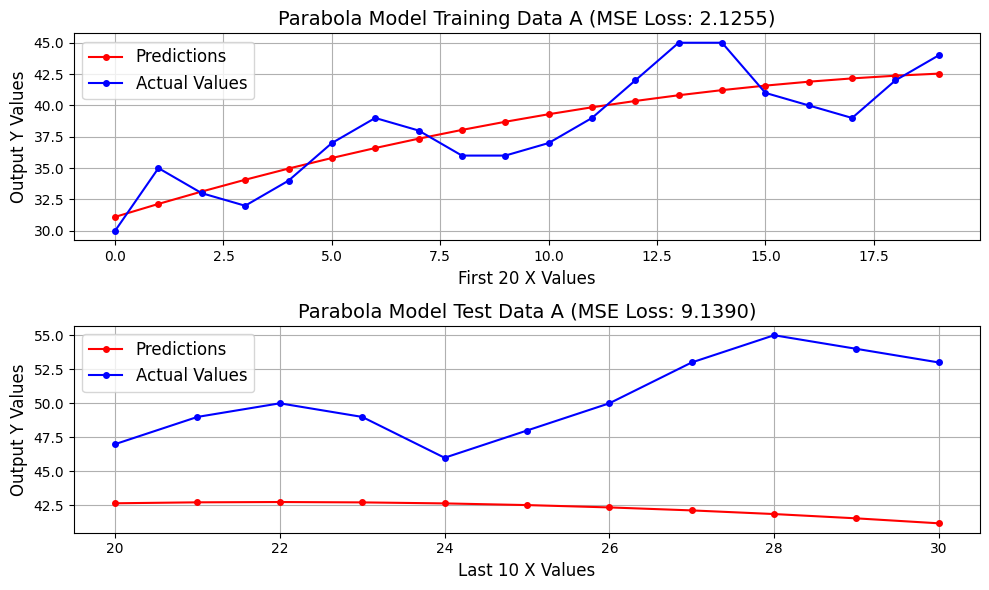

In [ ]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, figsize=(10, 6))

# Plot parabola_predictions_trainA vs Y_train_npA
axs[0].plot(X_train_npA, parabola_predictions_trainA, 'ro-', label='Predictions', markersize=4)
axs[0].plot(X_train_npA, Y_train_npA, 'bo-', label='Actual Values', markersize=4)
axs[0].set_title(f'Parabola Model Training Data A (MSE Loss: {parabola_error_trainA:.4f})', fontsize=14)
axs[0].set_xlabel('First 20 X Values', fontsize=12)
axs[0].set_ylabel('Output Y Values', fontsize=12)
axs[0].grid(True)
axs[0].legend(fontsize=12)

# Plot parabola_predictions_testA vs Y_test_npA
axs[1].plot(X_test_npA, parabola_predictions_testA, 'ro-', label='Predictions', markersize=4)
axs[1].plot(X_test_npA, Y_test_npA, 'bo-', label='Actual Values', markersize=4)
axs[1].set_title(f'Parabola Model Test Data A (MSE Loss: {parabola_error_testA:.4f})', fontsize=14)
axs[1].set_xlabel('Last 10 X Values', fontsize=12)
axs[1].set_ylabel('Output Y Values', fontsize=12)
axs[1].grid(True)
axs[1].legend(fontsize=12)

# Improve the layout
plt.tight_layout()
plt.show()

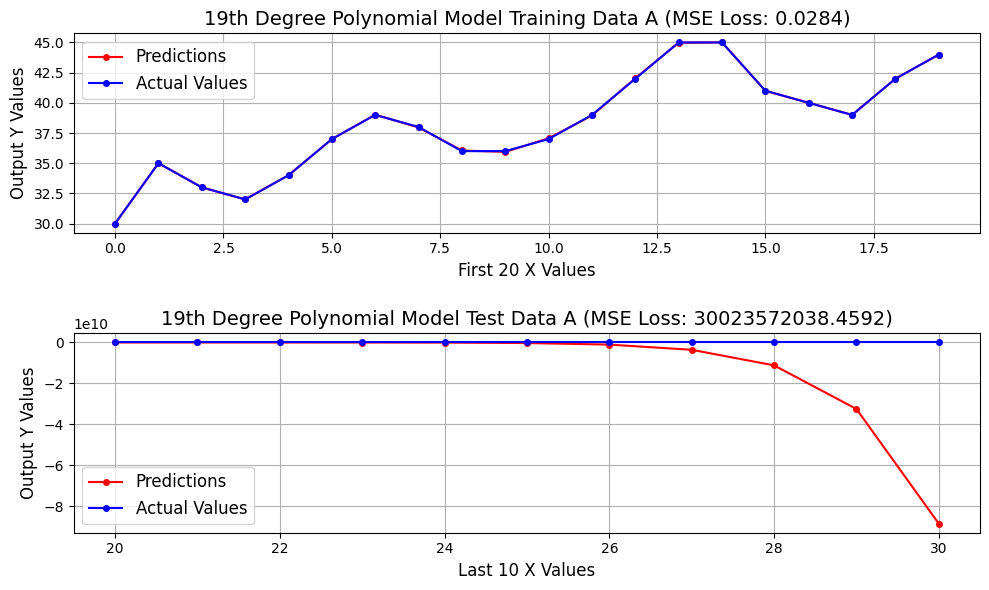

In [ ]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, figsize=(10, 6))

# Plot poly19_predictions_trainA vs Y_train_npA
axs[0].plot(X_train_npA, poly19_predictions_trainA, 'ro-', label='Predictions', markersize=4)
axs[0].plot(X_train_npA, Y_train_npA, 'bo-', label='Actual Values', markersize=4)
axs[0].set_title(f'19th Degree Polynomial Model Training Data A (MSE Loss: {poly19_error_trainA:.4f})', fontsize=14)
axs[0].set_xlabel('First 20 X Values', fontsize=12)
axs[0].set_ylabel('Output Y Values', fontsize=12)
axs[0].grid(True)
axs[0].legend(fontsize=12)

# Plot poly19_predictions_testA vs Y_test_npA
axs[1].plot(X_test_npA, poly19_predictions_testA, 'ro-', label='Predictions', markersize=4)
axs[1].plot(X_test_npA, Y_test_npA, 'bo-', label='Actual Values', markersize=4)
axs[1].set_title(f'19th Degree Polynomial Model Test Data A (MSE Loss: {poly19_error_testA:.4f})', fontsize=14)
axs[1].set_xlabel('Last 10 X Values', fontsize=12)
axs[1].set_ylabel('Output Y Values', fontsize=12)
axs[1].grid(True)
axs[1].legend(fontsize=12)

# Improve the layout
plt.tight_layout()
plt.show()

In [ ]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=np.RankWarning)
    
    # Split data into training and test sets
    X_train_npB = np.concatenate((X_np[:10], X_np[-10:]))
    Y_train_npB = np.concatenate((Y_np[:10], Y_np[-10:]))
    X_test_npB = X_np[10:-10]
    Y_test_npB = Y_np[10:-10]

    # Fit a line to the training data
    line_coeffs_trainB = np.polyfit(X_train_npB, Y_train_npB, deg=1)
    line_predictions_trainB = np.polyval(line_coeffs_trainB, X_train_npB)
    line_error_trainB = np.sqrt(np.sum((Y_train_npB - line_predictions_trainB) ** 2)/20)

    # Fit a parabola to the training data
    parabola_coeffs_trainB = np.polyfit(X_train_npB, Y_train_npB, deg=2)
    parabola_predictions_trainB = np.polyval(parabola_coeffs_trainB, X_train_npB)
    parabola_error_trainB = np.sqrt(np.sum((Y_train_npB - parabola_predictions_trainB) ** 2)/20)

    # Fit a 19th degree polynomial to the training data
    poly19_coeffs_trainB = np.polyfit(X_train_npB, Y_train_npB, deg=19)
    poly19_predictions_trainB = np.polyval(poly19_coeffs_trainB, X_train_npB)
    poly19_error_trainB = np.sqrt(np.sum((Y_train_npB - poly19_predictions_trainB) ** 2)/20)

    # Compute errors on test data
    line_predictions_testB = np.polyval(line_coeffs_trainB, X_test_npB)
    line_error_testB = np.sqrt(np.sum((Y_test_npB - line_predictions_testB) ** 2)/10)

    parabola_predictions_testB = np.polyval(parabola_coeffs_trainB, X_test_npB)
    parabola_error_testB = np.sqrt(np.sum((Y_test_npB - parabola_predictions_testB) ** 2)/10)

    poly19_predictions_testB = np.polyval(poly19_coeffs_trainB, X_test_npB)
    poly19_error_testB = np.sqrt(np.sum((Y_test_npB - poly19_predictions_testB) ** 2)/10)

# Print errors for each model on training and test data
print("LINE MODEL, -Test Middle-:")
print("Training Error:", line_error_trainB)
print("Test Error:", line_error_testB)
print()
print("PARABOLA MODEL, -Test Middle-:")
print("Training Error:", parabola_error_trainB)
print("Test Error:", parabola_error_testB)
print()
print("19th DEGREE POLYNOMIAL MODEL, -Test Middle-:")
print("Training Error:", poly19_error_trainB)
print("Test Error:", poly19_error_testB)

LINE MODEL, -Test Middle-:
Training Error: 1.8516699043293752
Test Error: 2.943490105614687

PARABOLA MODEL, -Test Middle-:
Training Error: 1.85083641159579
Test Error: 2.910426615782527

19th DEGREE POLYNOMIAL MODEL, -Test Middle-:
Training Error: 0.16381508563760222
Test Error: 507.53804019224077


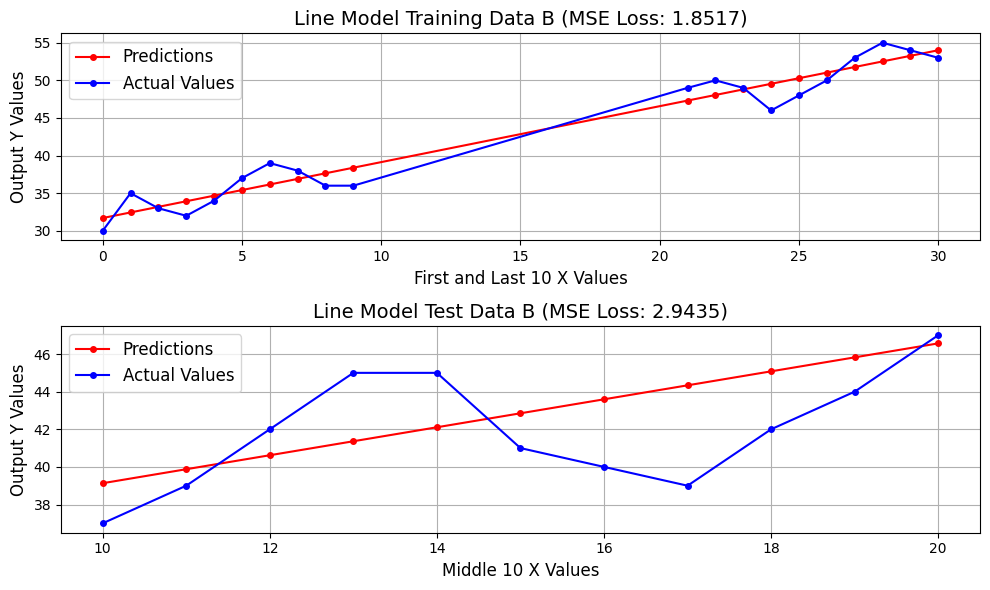

In [ ]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, figsize=(10, 6))

# Plot line_predictions_trainB vs Y_train_npB
axs[0].plot(X_train_npB, line_predictions_trainB, 'ro-', label='Predictions', markersize=4)
axs[0].plot(X_train_npB, Y_train_npB, 'bo-', label='Actual Values', markersize=4)
axs[0].set_title(f'Line Model Training Data B (MSE Loss: {line_error_trainB:.4f})', fontsize=14)
axs[0].set_xlabel('First and Last 10 X Values', fontsize=12)
axs[0].set_ylabel('Output Y Values', fontsize=12)
axs[0].grid(True)
axs[0].legend(fontsize=12)

# Plot line_predictions_testB vs Y_test_npB
axs[1].plot(X_test_npB, line_predictions_testB, 'ro-', label='Predictions', markersize=4)
axs[1].plot(X_test_npB, Y_test_npB, 'bo-', label='Actual Values', markersize=4)
axs[1].set_title(f'Line Model Test Data B (MSE Loss: {line_error_testB:.4f})', fontsize=14)
axs[1].set_xlabel('Middle 10 X Values', fontsize=12)
axs[1].set_ylabel('Output Y Values', fontsize=12)
axs[1].grid(True)
axs[1].legend(fontsize=12)

# Improve the layout
plt.tight_layout()
plt.show()

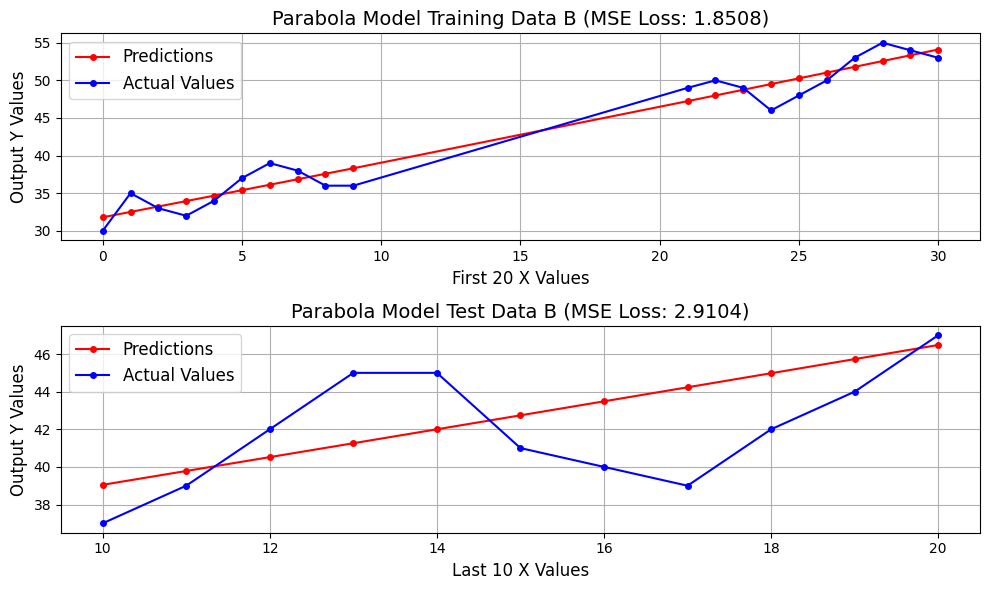

In [ ]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, figsize=(10, 6))

# Plot parabola_predictions_trainB vs Y_train_npB
axs[0].plot(X_train_npB, parabola_predictions_trainB, 'ro-', label='Predictions', markersize=4)
axs[0].plot(X_train_npB, Y_train_npB, 'bo-', label='Actual Values', markersize=4)
axs[0].set_title(f'Parabola Model Training Data B (MSE Loss: {parabola_error_trainB:.4f})', fontsize=14)
axs[0].set_xlabel('First 20 X Values', fontsize=12)
axs[0].set_ylabel('Output Y Values', fontsize=12)
axs[0].grid(True)
axs[0].legend(fontsize=12)

# Plot parabola_predictions_testB vs Y_test_npB
axs[1].plot(X_test_npB, parabola_predictions_testB, 'ro-', label='Predictions', markersize=4)
axs[1].plot(X_test_npB, Y_test_npB, 'bo-', label='Actual Values', markersize=4)
axs[1].set_title(f'Parabola Model Test Data B (MSE Loss: {parabola_error_testB:.4f})', fontsize=14)
axs[1].set_xlabel('Last 10 X Values', fontsize=12)
axs[1].set_ylabel('Output Y Values', fontsize=12)
axs[1].grid(True)
axs[1].legend(fontsize=12)

# Improve the layout
plt.tight_layout()
plt.show()

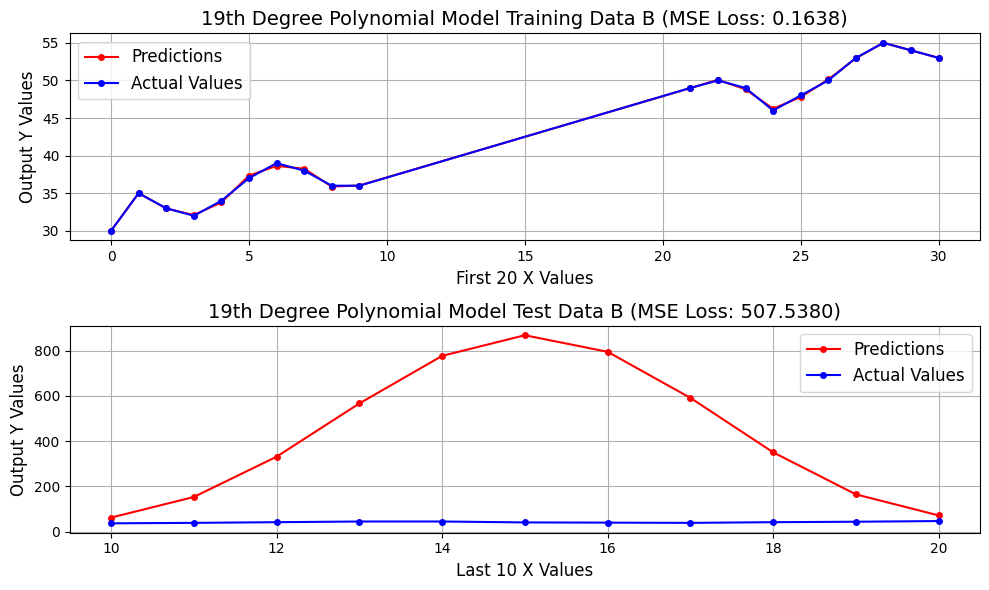

In [ ]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, figsize=(10, 6))

# Plot poly19_predictions_trainB vs Y_train_npB
axs[0].plot(X_train_npB, poly19_predictions_trainB, 'ro-', label='Predictions', markersize=4)
axs[0].plot(X_train_npB, Y_train_npB, 'bo-', label='Actual Values', markersize=4)
axs[0].set_title(f'19th Degree Polynomial Model Training Data B (MSE Loss: {poly19_error_trainB:.4f})', fontsize=14)
axs[0].set_xlabel('First 20 X Values', fontsize=12)
axs[0].set_ylabel('Output Y Values', fontsize=12)
axs[0].grid(True)
axs[0].legend(fontsize=12)

# Plot poly19_predictions_testB vs Y_test_npB
axs[1].plot(X_test_npB, poly19_predictions_testB, 'ro-', label='Predictions', markersize=4)
axs[1].plot(X_test_npB, Y_test_npB, 'bo-', label='Actual Values', markersize=4)
axs[1].set_title(f'19th Degree Polynomial Model Test Data B (MSE Loss: {poly19_error_testB:.4f})', fontsize=14)
axs[1].set_xlabel('Last 10 X Values', fontsize=12)
axs[1].set_ylabel('Output Y Values', fontsize=12)
axs[1].grid(True)
axs[1].legend(fontsize=12)

# Improve the layout
plt.tight_layout()
plt.show()

In [ ]:
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Lambda(lambda x: x.view(-1))])

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_data = mnist_train.data.numpy()
train_data = train_data.reshape(train_data.shape[0], -1)  # Flatten the images

In [ ]:
pca = PCA(n_components=20)
pca.fit(train_data)

# The PCA modes are stored in the components_ attribute
pca_modes = pca.components_

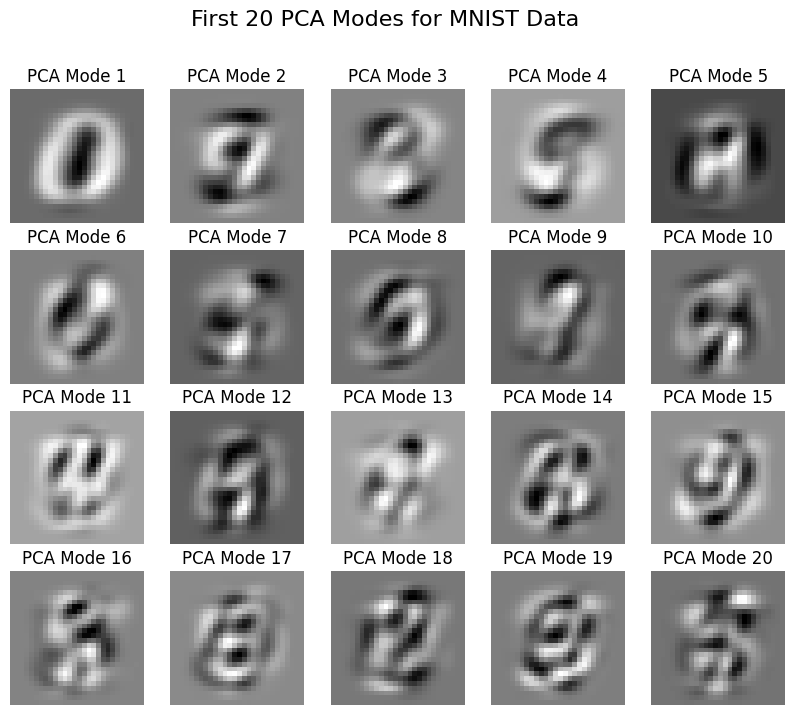

In [ ]:
# Plot the first 20 PCA modes
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    mode_image = pca_modes[i].reshape(28, 28)
    ax.imshow(mode_image, cmap='gray')
    ax.set_title(f'PCA Mode {i+1}')
    ax.axis('off')

# Add a title to the plot
fig.suptitle('First 20 PCA Modes for MNIST Data', fontsize=16)

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.2, hspace=0.2)

# Show the plot
plt.show()

In [ ]:
# Transform the data into the 20-component PCA space
train_data_pca = pca.transform(train_data)
train_labels = mnist_train.targets.numpy()

test_data = mnist_test.data.numpy()
test_data = test_data.reshape(test_data.shape[0], -1)  # Flatten the images
test_data_pca = pca.transform(test_data)
test_labels = mnist_test.targets.numpy()

In [ ]:
def compute_accuracy(model, x, y, is_torch_model=True):
    with torch.no_grad():
        if is_torch_model:
            x = torch.from_numpy(x).float()
            output = model(x)
            predicted = torch.argmax(output, dim=1).numpy()
        else:
            predicted = model.predict(x)
        accuracy = accuracy_score(y, predicted)
    return accuracy

In [ ]:
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

input_size = 20
hidden_size = 128
output_size = 10
learning_rate = 0.001
epochs = 20
batch_size = 64

model_ffnn = FFNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ffnn.parameters(), lr=learning_rate)
train_loader = DataLoader(TensorDataset(torch.from_numpy(train_data_pca).float(), torch.from_numpy(train_labels)), batch_size=batch_size, shuffle=True)

In [ ]:
for epoch in range(epochs):
    for i, (data, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model_ffnn(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

accuracy_ffnn = compute_accuracy(model_ffnn, test_data_pca, test_labels)
print()
print(f'Feed-forward neural network accuracy: {accuracy_ffnn:.4f}')

Epoch [5/20], Loss: 0.0001
Epoch [10/20], Loss: 0.2198
Epoch [15/20], Loss: 0.2847
Epoch [20/20], Loss: 0.3258

Feed-forward neural network accuracy: 0.9598


In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.unsqueeze(1)
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        c0 = torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model_lstm = LSTM(input_size, hidden_size, output_size)
optimizer = optim.Adam(model_lstm.parameters(), lr=learning_rate)

# Train the LSTM model
for epoch in range(epochs):
    for i, (data, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model_lstm(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

accuracy_lstm = compute_accuracy(model_lstm, test_data_pca, test_labels)
print()
print(f'LSTM accuracy: {accuracy_lstm:.4f}')

Epoch [5/20], Loss: 0.0587
Epoch [10/20], Loss: 0.0407
Epoch [15/20], Loss: 0.5882
Epoch [20/20], Loss: 0.2095

LSTM accuracy: 0.9551


In [ ]:
model_svm = SVC(kernel='rbf')
model_svm.fit(train_data_pca, train_labels)
accuracy_svm = compute_accuracy(model_svm, test_data_pca, test_labels, is_torch_model=False)
print(f'SVM accuracy: {accuracy_svm:.4f}')

SVM accuracy: 0.9754


In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(train_data_pca, train_labels)
accuracy_dt = compute_accuracy(model_dt, test_data_pca, test_labels, is_torch_model=False)
print(f'Decision tree accuracy: {accuracy_dt:.4f}')

Decision tree accuracy: 0.8481


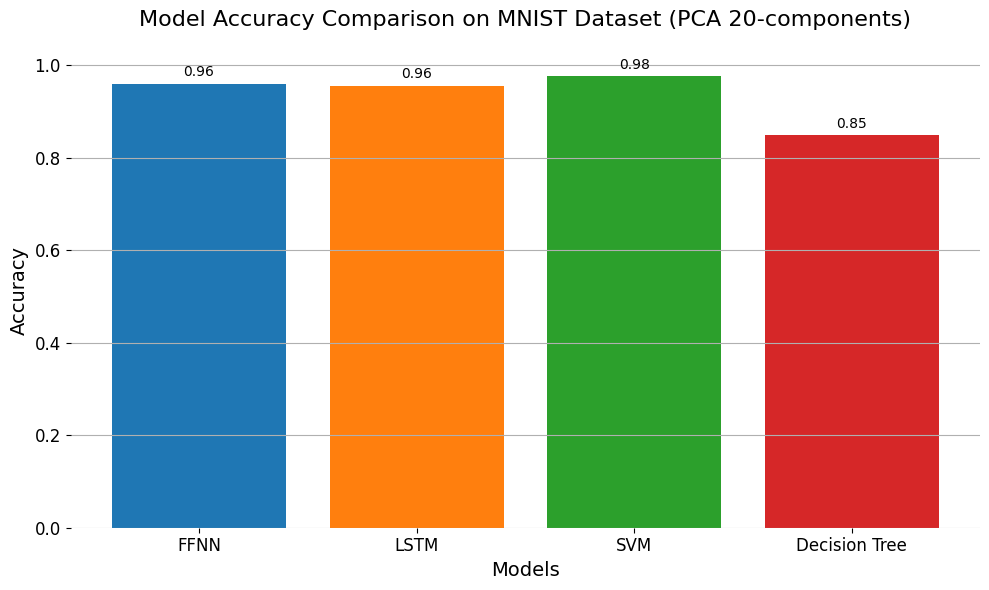

In [ ]:
models = ['FFNN', 'LSTM', 'SVM', 'Decision Tree']
accuracies = [accuracy_ffnn, accuracy_lstm, accuracy_svm, accuracy_dt]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot
bars = ax.bar(models, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Add data value on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Set the title and labels
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Model Accuracy Comparison on MNIST Dataset (PCA 20-components)', fontsize=16, pad=20)

# Set the tick label font size
ax.tick_params(axis='both', which='major', labelsize=12)

# Add grid lines
ax.yaxis.grid(True)

# Set the background color
ax.set_facecolor('white')

# Remove the frame
for spine in ax.spines.values():
    spine.set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

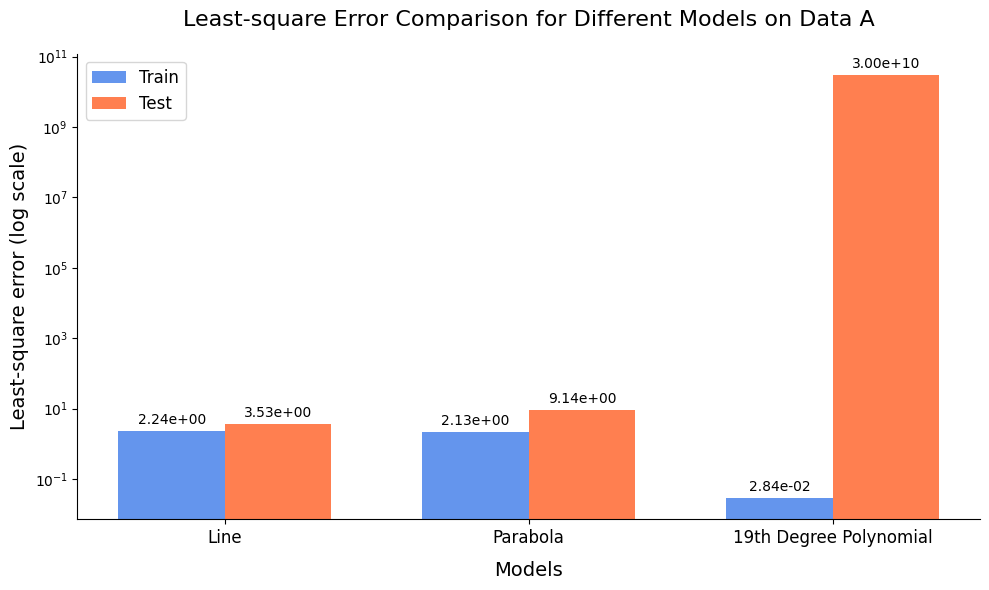

In [ ]:
models = ['Line', 'Parabola', '19th Degree Polynomial']
train_errors = [line_error_trainA, parabola_error_trainA, poly19_error_trainA]
test_errors = [line_error_testA, parabola_error_testA, poly19_error_testA]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_errors, width, label='Train', color='cornflowerblue')
rects2 = ax.bar(x + width/2, test_errors, width, label='Test', color='coral')

ax.set_xlabel('Models', fontsize=14, labelpad=10)
ax.set_ylabel('Least-square error (log scale)', fontsize=14)
ax.set_title('Least-square Error Comparison for Different Models on Data A', fontsize=16, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=12)

ax.set_yscale('log')  # Set log scale

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2e}',  # Use scientific notation
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(rects1)
autolabel(rects2)

ax.spines['top'].set_visible(False)  # Remove top border
ax.spines['right'].set_visible(False)  # Remove right border

fig.tight_layout()

plt.show()


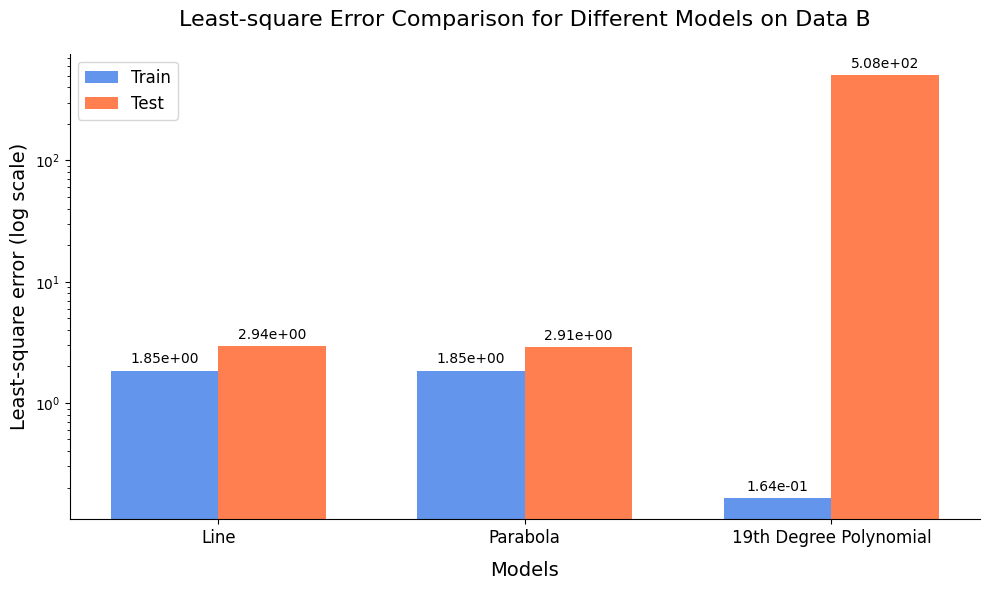

In [ ]:
models = ['Line', 'Parabola', '19th Degree Polynomial']
train_errors = [line_error_trainB, parabola_error_trainB, poly19_error_trainB]
test_errors = [line_error_testB, parabola_error_testB, poly19_error_testB]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_errors, width, label='Train', color='cornflowerblue')
rects2 = ax.bar(x + width/2, test_errors, width, label='Test', color='coral')

ax.set_xlabel('Models', fontsize=14, labelpad=10)
ax.set_ylabel('Least-square error (log scale)', fontsize=14)
ax.set_title('Least-square Error Comparison for Different Models on Data B', fontsize=16, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=12)

ax.set_yscale('log')  # Set log scale

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2e}',  # Use scientific notation
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(rects1)
autolabel(rects2)

ax.spines['top'].set_visible(False)  # Remove top border
ax.spines['right'].set_visible(False)  # Remove right border

fig.tight_layout()

plt.show()